<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [162]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [164]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [8]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [12]:
# Answer:
movies.duration.mean()

120.97957099080695

In [13]:
# Answer could also be:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [23]:
# Answer:
movies.sort_values('duration', ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
...,...,...,...,...,...,...
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

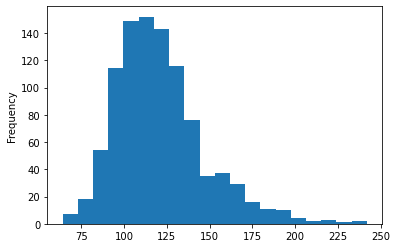

In [31]:
# Answer:
movies.duration.plot(kind='hist', bins=20);

#### Use a box plot to display that same data.

<AxesSubplot:>

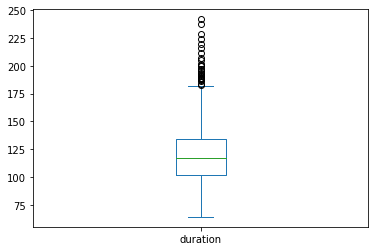

In [36]:
# Answer:
movies.duration.plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [39]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

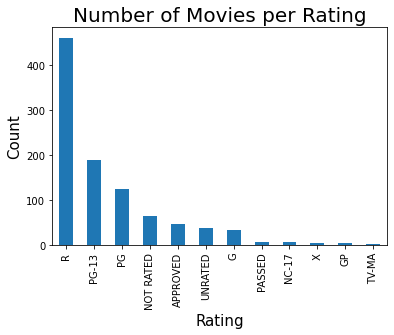

In [53]:
# Answer:
movies.content_rating.value_counts().plot(kind='bar').set_title('Number of Movies per Rating', fontsize=20);
plt.xlabel('Rating', fontsize=15);
plt.ylabel('Count', fontsize=15); 



#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [59]:
# Answer:
# ufo.State.replace('Fl', 'FL', inplace=True)
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)


In [60]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [68]:
# Answer:
movies.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace=True)

In [69]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [71]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [76]:
# Answer:
movies.sort_values('content_rating')

,star_rating,title,content_rating,genre,duration,actors_list
368,8.0,Planet of the Apes,G,Adventure,112,"[u'Charlton Heston', u'Roddy McDowall', u'Kim ..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
361,8.0,Fiddler on the Roof,G,Drama,181,"[u'Topol', u'Norma Crane', u'Leonard Frey']"
35,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
625,7.7,Ponyo,G,Animation,101,"[u'Cate Blanchett', u'Matt Damon', u'Liam Nees..."
...,...,...,...,...,...,...
217,8.1,Memories of Murder,UNRATED,Crime,132,"[u'Kang-ho Song', u'Sang-kyung Kim', u'Roe-ha ..."
252,8.1,Arsenic and Old Lace,UNRATED,Comedy,118,"[u'Cary Grant', u'Priscilla Lane', u'Raymond M..."
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."


In [77]:
# Answer to replace the missing values with  
movies.content_rating.fillna(value='No Rating', inplace=True)

In [79]:
movies.content_rating.value_counts()

R            460
PG-13        189
UNRATED      160
PG           123
G             32
NC-17         12
No Rating      3
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [139]:
# Answer for greater than or equal to 2 hours:
movies[movies.duration >= 120].star_rating.mean()

7.948898678414082

In [140]:
# Answer for less than 2 hours
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

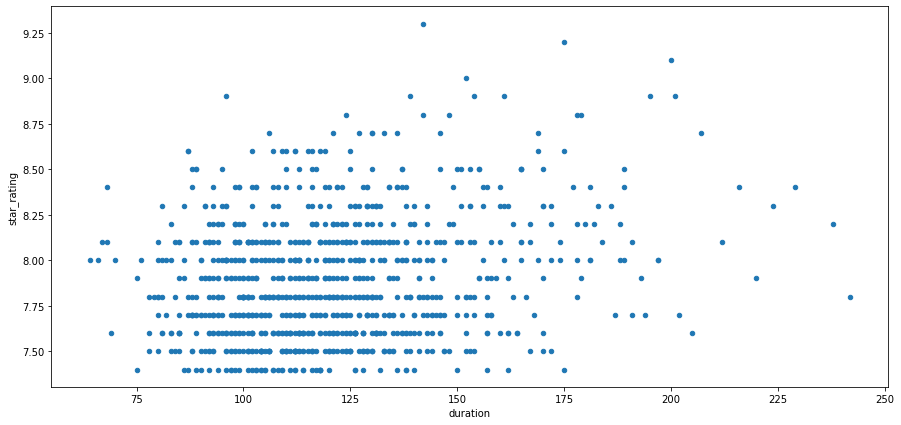

In [135]:
# Answer:

movies.plot(kind = 'scatter', x='duration', y='star_rating', figsize=(15,7));

# there does not seem to be a relationship

#### Calculate the average duration for each genre.

In [136]:
# Answer:
movies.groupby('genre').duration.mean()


genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

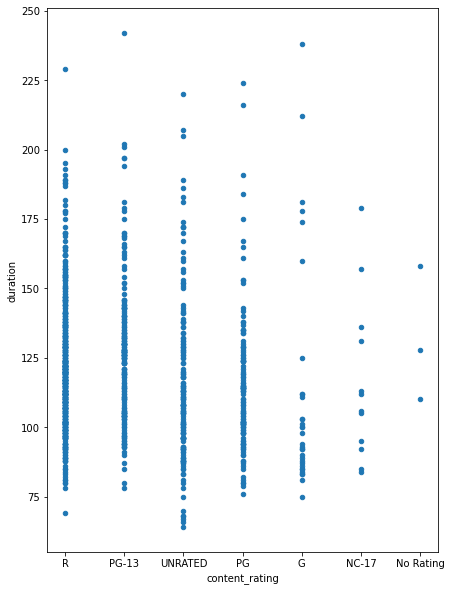

In [138]:
# Answer:
movies.plot(kind = 'scatter', x='content_rating', y='duration', figsize=(7,10));


array([[<AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'NC-17'}>,
        <AxesSubplot:title={'center':'No Rating'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'PG-13'}>,
        <AxesSubplot:title={'center':'R'}>],
       [<AxesSubplot:title={'center':'UNRATED'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

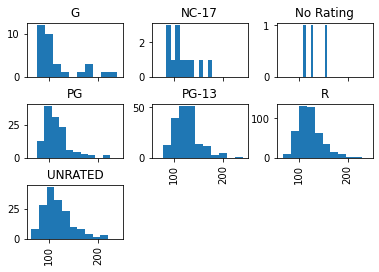

In [113]:
movies.duration.hist(by=movies.content_rating, sharex=True)

#### Determine the top rated movie (by star rating) for each genre.

In [119]:
# Answer:
movies.sort_values('star_rating', ascending=False).groupby('genre')['title','star_rating'].first()

C:\Users\604401\AppData\Local\Temp\ipykernel_7744\2949259210.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  movies.sort_values('star_rating', ascending=False).groupby('genre')['title','star_rating'].first()


,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Modern Times,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [149]:
# Answer:
movies.loc[movies.duplicated(['title']), :]


,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,No Rating,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [157]:
movies.loc[movies['title'].isin(['The Girl with the Dragon Tattoo', 'Dracula', 'Les Miserables', 'True Grit'])].sort_values('title')
# Answer - they are not actually duplicates as the rating, duration, actors_list, star_rating, and in some instances 
# the content_rating are all different values

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,No Rating,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [154]:
movies.title.value_counts()


Dracula                            2
The Girl with the Dragon Tattoo    2
Les Miserables                     2
True Grit                          2
The Shawshank Redemption           1
                                  ..
In the Heat of the Night           1
Nosferatu                          1
Black Swan                         1
Ratatouille                        1
Wall Street                        1
Name: title, Length: 975, dtype: int64

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [231]:
# first seeing all counts 
movies_vc = movies.genre.value_counts()
movies_vc

# movies[movies_vc[movies_vc >= 10]].star_rating()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [232]:
#movies_vc

In [196]:
# filtering out genres with less than 10 movies
genre_count = movies_vc.loc[lambda x : x>10]
genre_count


Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Name: genre, dtype: int64

In [202]:
# Answer:


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [193]:
# Answer:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [226]:
# Answer:

genre_star_rating = movies.groupby('genre').agg(genre_count=('genre', 'size'), mean_star_rating=('star_rating', 'mean')) 

genre_star_rating[genre_star_rating['genre_count'] >= 10]
    


,genre_count,mean_star_rating
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!